In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Adicione a sua base nos arquivos
nomeDaBase = "base.csv"

# Nome da sua variável alvo
variavelAlvo = 'STRKBASE'

# Carrega a base de dados
AVC = pd.read_csv(nomeDaBase)
AVC.shape

In [ ]:
AVC["STRKBASE"].value_counts()

0    4882
1    4882
2    4882
Name: STRKBASE, dtype: int64

In [ ]:
# usamos X para os valores das entradas e y para os valores das saídas(atributo classificador)
X = AVC.drop('STRKBASE', axis = 1)
y = AVC["STRKBASE"]

In [ ]:
#Definindo o conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
param_grid = {
    #'bootstrap': True, #booleano indicando se as amostras são amostradas com substituição (True) ou sem substituição (False).
    #'ccp_alpha': 0.0, # parâmetro de complexidade usado para podar as árvores de decisão no conjunto.
    #'class_weight': None, #define o peso das classes. Se não for definido, todas as classes terão o mesmo peso.
    'criterion':'entropy', #função usada para medir a qualidade da divisão. 'gini' para o índice Gini e 'entropy' para a entropia.
    'max_depth': None, #profundidade máxima de cada árvore. Se não for definido, os nós são expandidos até que todas as folhas contenham menos de min_samples_split amostras.
    'max_features': 'sqrt', #número máximo de recursos considerados para dividir um nó. 'auto' usa todas as características, enquanto 'sqrt' e 'log2' usam a raiz quadrada e o logaritmo base 2 do número total de características, respectivamente.
    #'max_leaf_nodes': None, #número máximo de folhas nas árvores.
    #'max_samples': None, #número máximo de amostras usadas para treinar cada árvore.
    #'min_impurity_decrease': 0.0, #valor mínimo de redução de impureza necessária para dividir um nó.
    'min_samples_leaf': 10, #número mínimo de amostras necessárias em um nó folha.
    'min_samples_split': 2, #número mínimo de amostras necessárias para dividir um nó interno.
    #'min_weight_fraction_leaf': 0.0,  #fração mínima do número total de amostras que deve estar em um nó folha.
    'n_estimators': 200, #número de árvores na floresta.
    'n_jobs': -1, #número de trabalhos a serem executados em paralelo. -1 usa todos os núcleos disponíveis.
    #'oob_score': False, #booleano indicando se deve ser calculado o score out-of-bag para cada amostra de treinamento.
    'random_state': 42, # semente para gerar números aleatórios.
    #'verbose': 0, #nível de detalhe das mensagens de registro
    #'warm_start': False #booleano indicando se o ajuste deve ser incremental.
}

In [ ]:
# Criando o modelo com os parâmetros definidos
rf = RandomForestClassifier(**param_grid)

In [ ]:
# Treinando o modelo com dados de treino
rfit = rf.fit(X_train, y_train)

In [ ]:
# Fazendo previsões com dados de teste
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 0, ..., 2, 0, 2])

In [ ]:
#predição
entrada = np.array([0,138,74,0,1,25.50063386895584,0,31,0,0,0,0,0,2,0,0,1,0,0,1,0,0,0,0])
entrada = entrada.reshape(1, -1) # redimensiona para 1 linha e n colunas
pred = rf.predict(entrada)
pred

array([0])

**Métricas**

In [ ]:
# Calcular o erro médio quadrático (MSE) da predição
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Erro de predição:', mse)

Erro de predição: 0.28265817023213474


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.5316560638534416

In [ ]:
#Validação cruzada
#Com cv = 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv = 10, scoring = 'accuracy')
def intervalo(scores):
    mean = scores.mean()
    dv = scores.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Desvio padrão: {:.5f}%'.format(dv*100))
intervalo(scores)

Acurácia média: 89.43%
Desvio padrão: 3.32781%


In [ ]:
#F1-score médio
#cv = 10
scoresf1 = cross_val_score(rf, X, y, cv = 10, scoring = 'f1_micro')
def intervalo_prec(scoresf1):
    mean = scoresf1.mean()
    dv = scoresf1.std()
    print('F1-score médio: {:.2f}%'.format(mean*100))
intervalo_prec(scoresf1)

F1-score médio: 89.43%


In [ ]:
#precisão média
#cv = 10
scoresp = cross_val_score(rf, X, y, cv = 10, scoring = 'precision_micro')
def intervalo_prec(scores):
    mean = scores.mean()
    dv = scores.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
intervalo_prec(scoresp)

Precisão média: 89.43%


In [ ]:
#Recall médio
#cv = 10
scoresr = cross_val_score(rf, X, y, cv = 10, scoring = 'recall_micro')
def intervalo_prec(scores):
    mean = scores.mean()
    print('Recall médio: {:.2f}%'.format(mean*100))
intervalo_prec(scoresr)

Recall médio: 89.43%


In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred)

<Axes: >

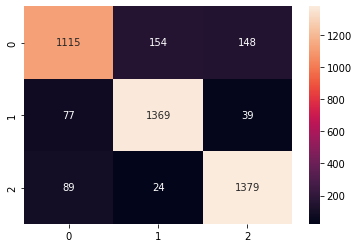

In [ ]:
#matriz de confusão
import seaborn as sns
sns.heatmap(cm1,annot=True, fmt="d")

In [ ]:
#kappa
from sklearn.metrics import confusion_matrix, cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.8185440181324238

In [ ]:
#log_loss
from sklearn.metrics import log_loss
pred = rf.predict_proba(X_test)
log_loss(y_test,pred)

0.5518728314418427

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, rf.predict_proba(X), multi_class='ovr', average="micro")

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.5309664470040454

In [ ]:
#Curva auc
from sklearn.metrics import roc_auc_score
y_score = rf.predict_proba(X_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

micro_roc_auc_ovr
#print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

0.9667127909971165

In [ ]:
cr = classification_report(y_test, y_pred,labels=avcclasse)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1417
           1       0.88      0.92      0.90      1485
           2       0.88      0.92      0.90      1492

    accuracy                           0.88      4394
   macro avg       0.88      0.88      0.88      4394
weighted avg       0.88      0.88      0.88      4394



**Curvas**

In [ ]:
#curva de aprendizagem
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison

plot_learning_curves(X_train, y_train, X_test, y_test, rfit)
plt.show()

# **Importância**

In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.056 seconds


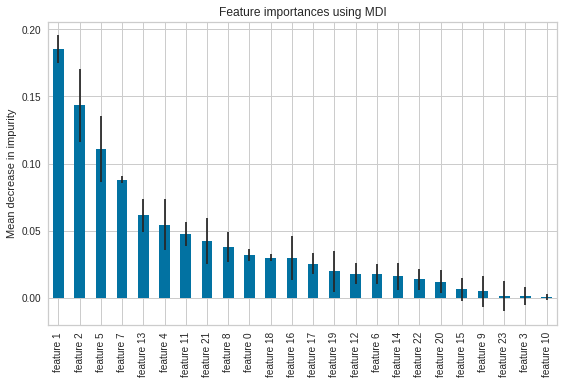

In [ ]:
import pandas as pd
#Importancia dos  atributos com os recursos
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [ ]:
#Importancia dos atributos com permutação
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)

Elapsed time to compute the importances: 46.165 seconds


In [ ]:
attributes = ["GEND01", "SUPSYS16", "SUPDIA16", "ATRFIB07", "DIABETES", "BMI", "FHSTK", "BEAT14", "HEAR01",
              "NERV01", "KIDNEY01", "DIAG01", 'HEART01', "SMOKE", 'DIZZYP07', "NAUSEP07", "FATIGP07",
              "RECOGN08", "CHSTPN07", "LEGWLK07", "PALPIP07", "CONVER08", "LIFTNG09", "WHOME09", "STRKBASE"]

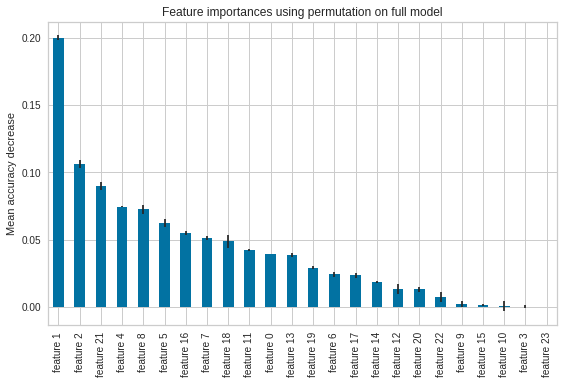

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()